In [1]:
import pandas as pd

# Usar raw string (r"...") para evitar errores con las barras invertidas
ruta_archivo = r"C:\Users\Kenin Ojeda\Documents\uni-admission\data\raw\Ingresantes_UNI_BAL_60_40.xlsx"

# Leer el archivo Excel
df = pd.read_excel(ruta_archivo)

# Mostrar las primeras filas para verificar
df.head()


,IDHASH,COLEGIO,COLEGIO_DEPA,COLEGIO_PROV,COLEGIO_DIST,COLEGIO_PAIS,COLEGIO_ANIO_EGRESO,ESPECIALIDAD,ANIO_POSTULA,CICLO_POSTULA,...,NACIMIENTO_PROV,NACIMIENTO_DIST,SEXO,h_e_Matemática,h_e_fisica_quimica,h_e_Aptitud,h_total_semana,calificacion,INGRESO,MODALIDAD
0,E4287C2FE19F63C5E6641955147E36684A5A2FF8064676...,LA DIVINA PROVIDENCIA,LIMA,LIMA,SURQUILLO,PERU,2020,INGENIERIA DE SISTEMAS,2021,1,...,LIMA,VILLA EL SALVADOR,MASCULINO,13.0,6.8,2.2,22.0,311.0,NO,EXTRAORDINARIO1 - DEPORTISTAS CALIFICADOS DE A...
1,2DC37F0B9727B6591EC72D7A942647797A200F45D47C9E...,86019 LA LIBERTAD,ANCASH,HUARAZ,HUARAZ,PERU,2017,INGENIERIA DE TELECOMUNICACIONES,2021,1,...,HUARAZ,HUARAZ,FEMENINO,13.7,9.1,3.4,26.2,358.0,NO,ORDINARIO
2,3B8677B90781D7BB8F2F967C05FA2DBBE153BBB682DF05...,0113 DANIEL ALOMIAS ROBLES,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PERU,2016,INGENIERIA MECANICA,2021,1,...,LIMA,JESUS MARIA,MASCULINO,14.1,8.2,3.0,25.3,804.0,NO,ORDINARIO
3,FA366704D9E9F6FB5E5F55C1FB0CEEE973C626A5616F55...,SEBASTIAN SALAZAR BONDY,LIMA,LIMA,SANTA ANITA,PERU,2018,INGENIERIA ELECTRONICA,2021,1,...,LIMA,LIMA,MASCULINO,15.5,9.0,4.1,28.6,1082.0,NO,EXTRAORDINARIO 2 - INGRESO DIRECTO CEPRE
4,E31CF8F30F3AE60B3D8A14F6E1020E9AD26EE975F0823B...,TRILCE LOS OLIVOS,LIMA,LIMA,SAN MARTIN DE PORRES,PERU,2020,ARQUITECTURA,2021,1,...,LIMA,COMAS,FEMENINO,14.4,7.6,2.4,24.4,621.0,NO,ORDINARIO


# **VARIABLES DE INTERES**

In [2]:
# Convertir 'INGRESO' a binario
df['INGRESO'] = df['INGRESO'].map({'NO': 0, 'SI': 1})

# Seleccionar variables de interés
cols = [
    'h_e_Matemática', 'h_e_fisica_quimica', 'h_e_Aptitud', 'h_total_semana',
    'calificacion', 'SEXO', 'MODALIDAD', 'ESPECIALIDAD',
    'COLEGIO_DEPA', 'DOMICILIO_DEPA', 'CICLO_POSTULA', 'INGRESO'
]

# Crear copia del subconjunto sin valores nulos
df_modelo = df[cols].dropna()

# Verificar valores nulos restantes
print(df_modelo.isnull().sum())


h_e_Matemática        0
h_e_fisica_quimica    0
h_e_Aptitud           0
h_total_semana        0
calificacion          0
SEXO                  0
MODALIDAD             0
ESPECIALIDAD          0
COLEGIO_DEPA          0
DOMICILIO_DEPA        0
CICLO_POSTULA         0
INGRESO               0
dtype: int64


# **VARIABLES NUMERICAS**

✅ Matriz de correlación:
                     CICLO_POSTULA  h_e_Matemática  h_e_fisica_quimica  \
CICLO_POSTULA            1.000000        0.217528            0.219069   
h_e_Matemática           0.217528        1.000000            0.958149   
h_e_fisica_quimica       0.219069        0.958149            1.000000   
h_e_Aptitud              0.175409        0.685217            0.778310   
h_total_semana           0.221383        0.981210            0.986864   
calificacion             0.321706        0.747196            0.752997   
INGRESO                  0.090264        0.869307            0.872915   

                    h_e_Aptitud  h_total_semana  calificacion   INGRESO  
CICLO_POSTULA          0.175409        0.221383      0.321706  0.090264  
h_e_Matemática         0.685217        0.981210      0.747196  0.869307  
h_e_fisica_quimica     0.778310        0.986864      0.752997  0.872915  
h_e_Aptitud            1.000000        0.798373      0.610608  0.705460  
h_total_semana     

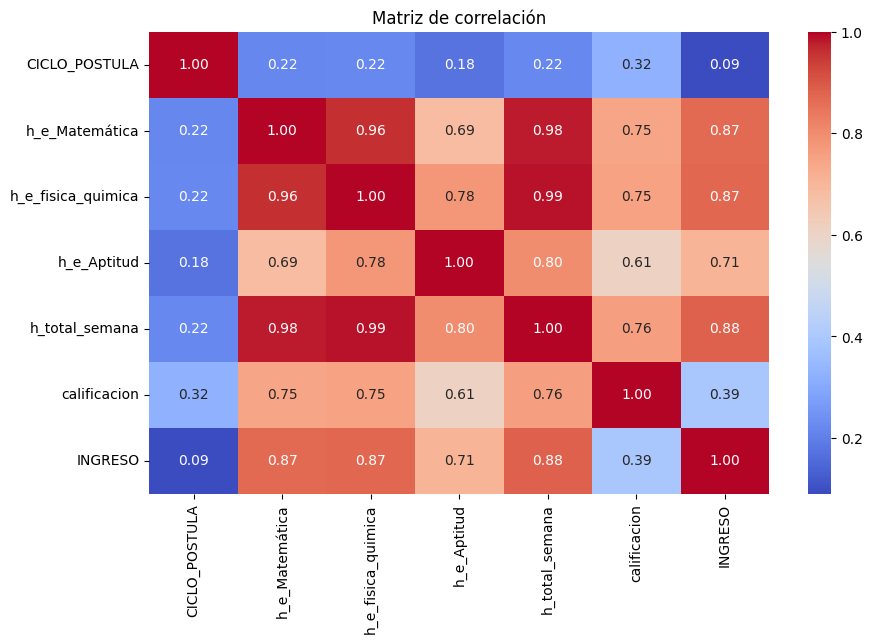

In [7]:
# Seleccionar columnas numéricas para análisis de correlación
numericas = [
    'CICLO_POSTULA','h_e_Matemática', 'h_e_fisica_quimica', 'h_e_Aptitud',
    'h_total_semana', 'calificacion', 'INGRESO'
]

# Asegurar que son numéricas y eliminar NaN
df_numerico = df_modelo[numericas].apply(pd.to_numeric, errors='coerce').dropna()

# Matriz de correlación
corr = df_numerico.corr()
print("✅ Matriz de correlación:\n", corr)

# Gráfico de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación")
plt.show()



👉
h_total_semana con:
*    h_e_Matemática: 0.98
*   h_e_fisica_quimica: 0.99
*   h_e_Aptitud: 0.80

Esto significa que h_total_semana está casi perfectamente correlacionada con h_e_Matemática y h_e_fisica_quimica, y altamente correlacionada con h_e_Aptitud.
En otras palabras, si usas h_total_semana, ya estás incluyendo casi toda la información de las otras tres.

👉 h_e_Matemática con h_e_fisica_quimica: 0.96

Ambas van prácticamente juntas: quien estudia una, suele estudiar también la otra en proporciones muy similares.

👉 h_e_Matemática con h_e_Aptitud: 0.68 y h_e_fisica_quimica con h_e_Aptitud: 0.78

Correlación alta, aunque no tan extrema. Sugiere que muchos estudiantes tienen un patrón de estudio equilibrado.

👉 calificacion con h_e_Matemática y h_e_fisica_quimica: 0.75

Puede estar capturando un reflejo del esfuerzo, pero también introduce redundancia si ya usas las horas de estudio.

🧠 Conclusiones de este análisis:

*   h_total_semana es redundante con h_e_Matemática y h_e_fisica_quimica. Usar los tres juntos no es recomendable.

*   Si usas h_total_semana, entonces no deberías incluir h_e_Matemática ni h_e_fisica_quimica, porque ya están altamente incluidas.

*   h_e_Aptitud aporta valor adicional, aunque parcialmente esté reflejada en h_total_semana.

*   calificacion tiene redundancia parcial con horas de estudio, pero también puede captar factores escolares externos, así que su inclusión puede estar justificada si quieres diversidad de fuentes.


# **VARIABLES CATEGORICAS**

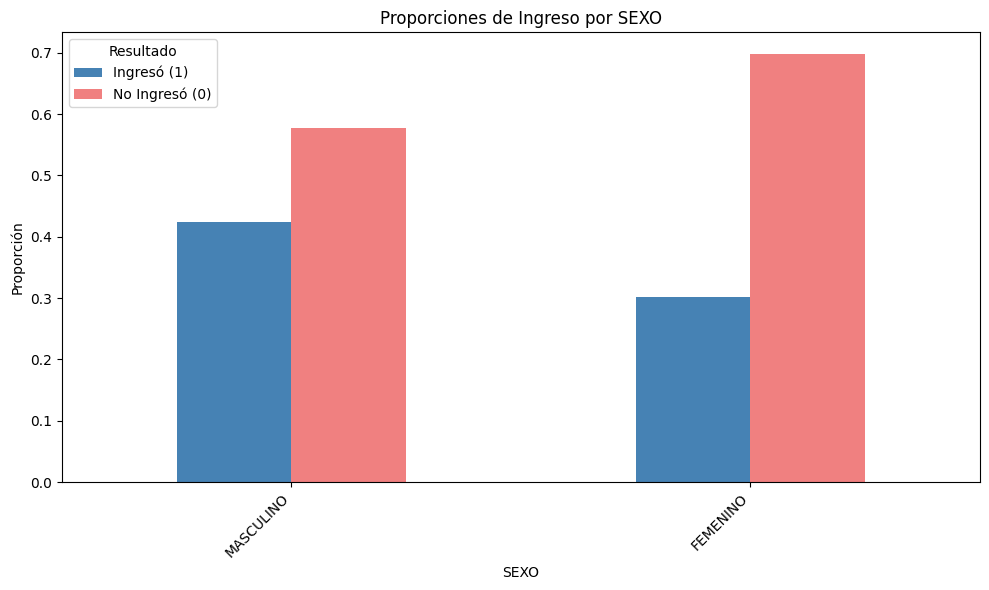

C:\Users\Kenin Ojeda\AppData\Local\Temp\ipykernel_2940\2365898823.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


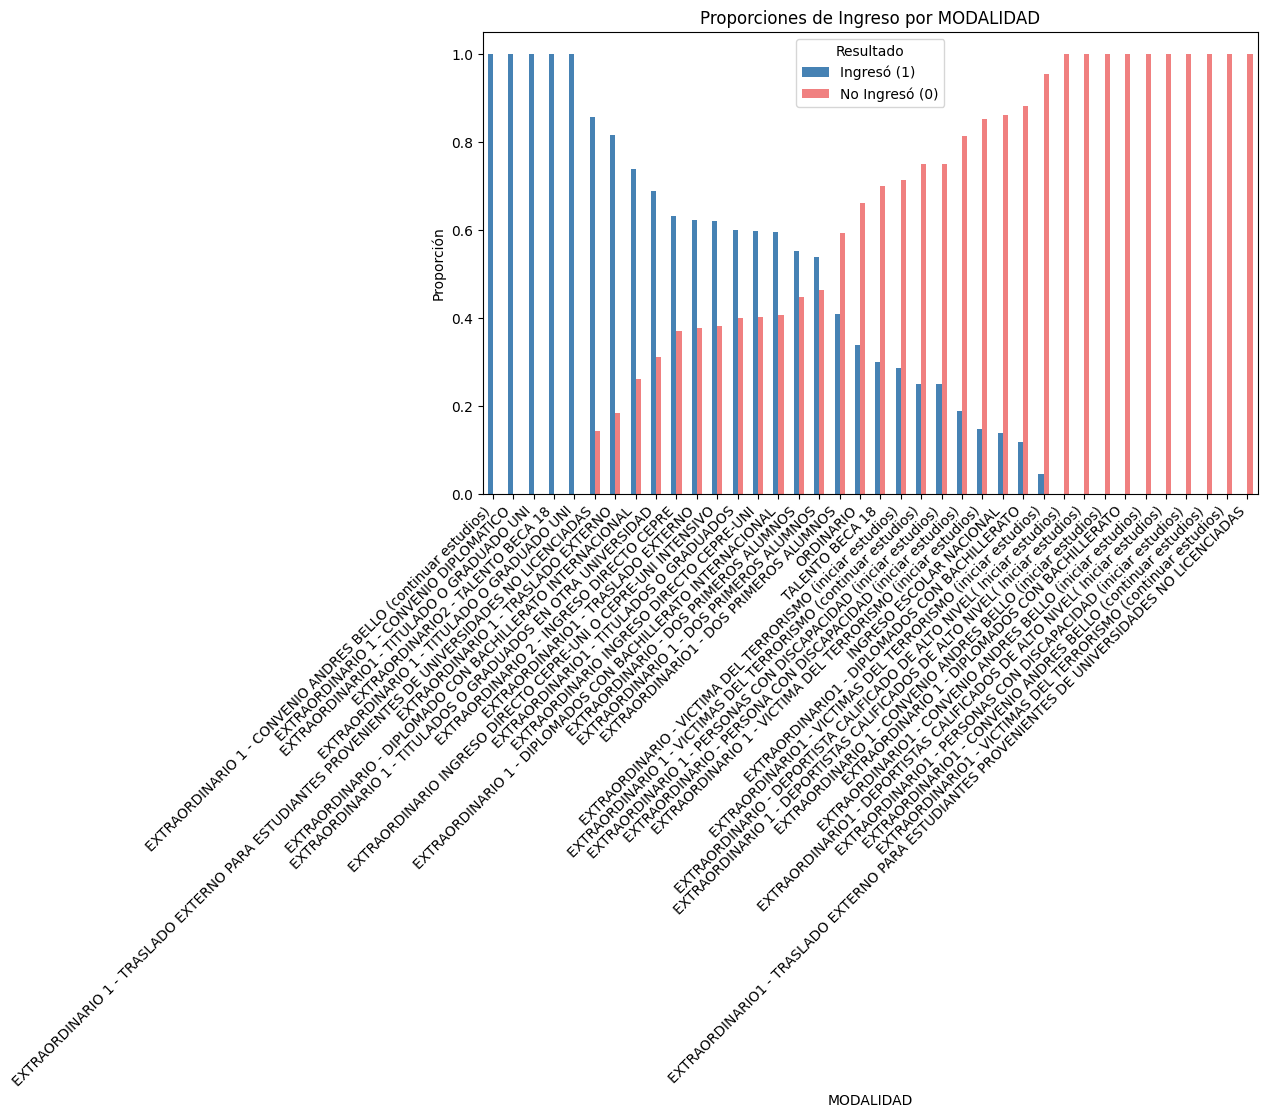

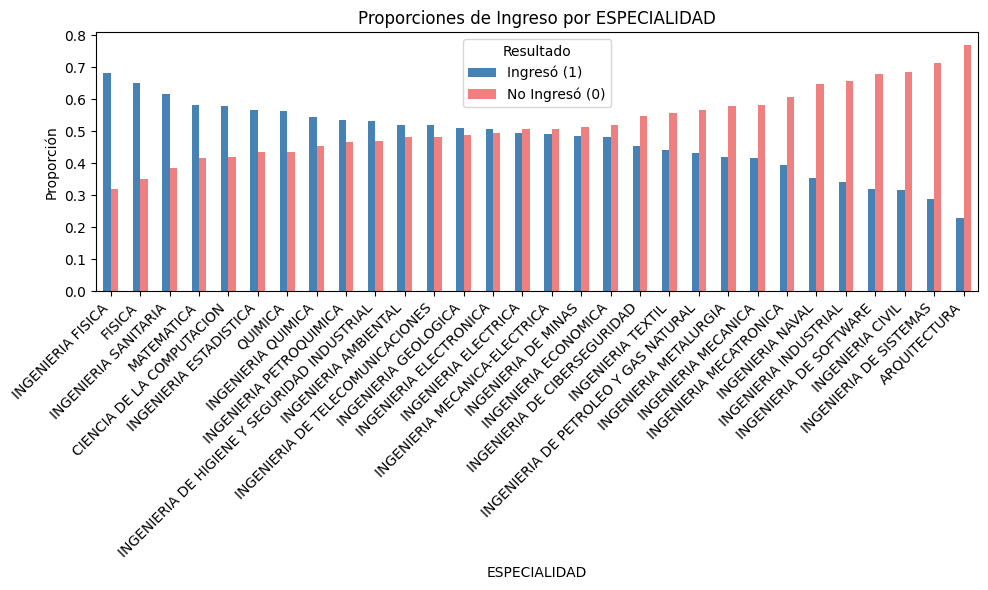

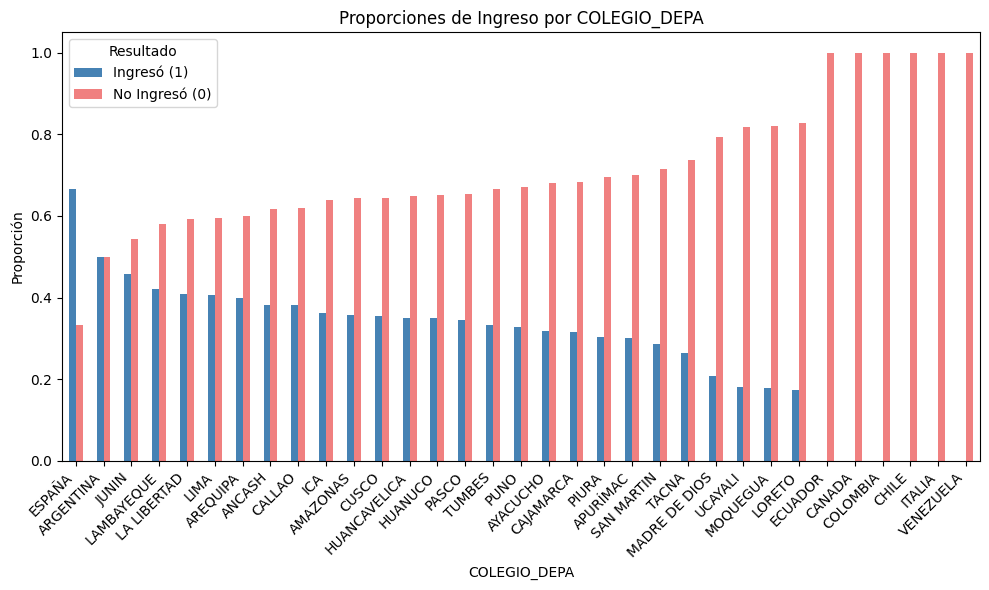

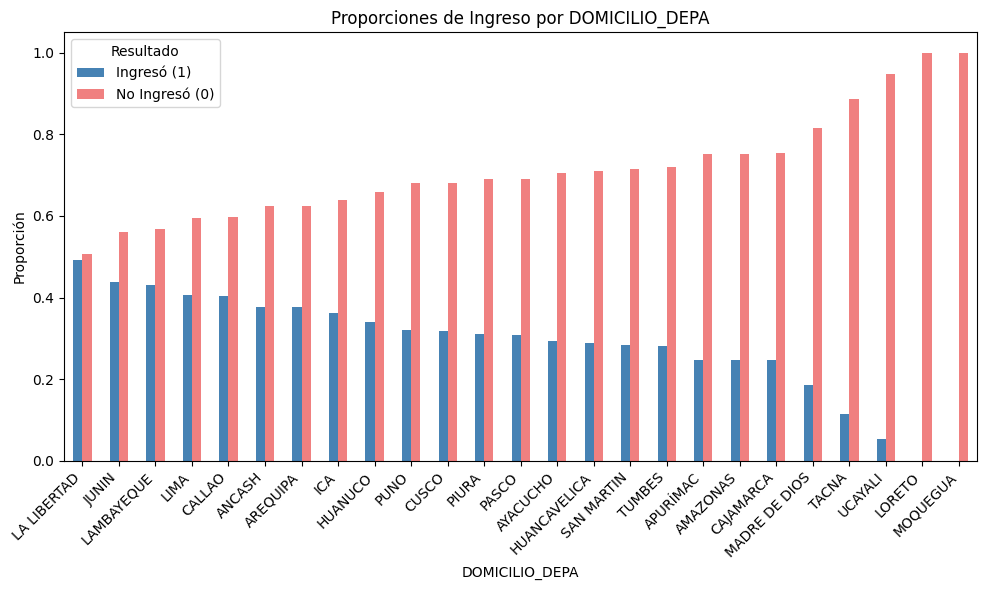

In [8]:
import matplotlib.pyplot as plt

# Variables categóricas a analizar
cat_vars = ['SEXO', 'MODALIDAD', 'ESPECIALIDAD', 'COLEGIO_DEPA', 'DOMICILIO_DEPA']

# Eliminar filas con NaN en las columnas categóricas o en la variable objetivo
df_cat = df_modelo.dropna(subset=cat_vars + ['INGRESO'])

# Graficar proporciones de ingreso por variable categórica
for col in cat_vars:
    proporciones = df_cat.groupby(col)['INGRESO'].value_counts(normalize=True).unstack().fillna(0)
    proporciones.columns = ['No Ingresó (0)', 'Ingresó (1)']
    proporciones = proporciones.sort_values('Ingresó (1)', ascending=False)

    proporciones[['Ingresó (1)', 'No Ingresó (0)']].plot(
        kind='bar', figsize=(10, 6),
        title=f"Proporciones de Ingreso por {col}",
        color=['steelblue', 'lightcoral']
    )
    plt.ylabel('Proporción')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Resultado')
    plt.tight_layout()
    plt.show()


In [9]:
# Asegurar limpieza solo si no se hizo antes
df_cat = df_modelo.dropna(subset=['SEXO', 'MODALIDAD', 'ESPECIALIDAD', 'COLEGIO_DEPA', 'DOMICILIO_DEPA', 'INGRESO'])

# Variables categóricas
variables_categoricas = ['SEXO', 'MODALIDAD', 'ESPECIALIDAD', 'COLEGIO_DEPA', 'DOMICILIO_DEPA']

# Calcular proporciones por categoría
proporciones = {
    col: df_cat.groupby(col)['INGRESO'].value_counts(normalize=True).unstack().fillna(0).rename(columns={0: 'No Ingresó (0)', 1: 'Ingresó (1)'})
    for col in variables_categoricas
}



**Agrupar categorías con pocos casos (menos del 1% por ejemplo) para evitar redundancias y sesgos**

In [10]:
# Paso: Agrupar categorías con pocos casos (menos del 1% por ejemplo)
umbral = 0.01 * len(df_modelo)  # 1% del total

# Agrupar en 'OTROS' las categorías poco frecuentes
for col in ['MODALIDAD', 'COLEGIO_DEPA', 'DOMICILIO_DEPA']:
    frecs = df_modelo[col].value_counts()
    categorias_menores = frecs[frecs < umbral].index
    df_modelo[col] = df_modelo[col].replace(categorias_menores, 'OTROS')
    # Ver cómo quedó cada columna categórica después de la agrupación
for col in ['MODALIDAD', 'COLEGIO_DEPA', 'DOMICILIO_DEPA']:
    print(f"--- {col} ---")
    print(df_modelo[col].value_counts(dropna=False))  # muestra también si hay NaN
    print("\n")

--- MODALIDAD ---
MODALIDAD
ORDINARIO                                                         31601
EXTRAORDINARIO 2 - INGRESO DIRECTO CEPRE                           8287
INGRESO ESCOLAR NACIONAL                                           8028
EXTRAORDINARIO INGRESO DIRECTO CEPRE-UNI                           5485
OTROS                                                              2753
EXTRAORDINARIO INGRESO DIRECTO CEPRE-UNI O CEPRE-UNI INTENSIVO     2503
Name: count, dtype: int64


--- COLEGIO_DEPA ---
COLEGIO_DEPA
LIMA          44739
OTROS          4067
CALLAO         2709
JUNIN          1950
ANCASH         1322
ICA             866
AYACUCHO        832
PUNO            804
LAMBAYEQUE      710
CAJAMARCA       658
Name: count, dtype: int64


--- DOMICILIO_DEPA ---
DOMICILIO_DEPA
LIMA        47450
OTROS        3553
CALLAO       2956
JUNIN        1609
ANCASH        948
ICA           827
PUNO          701
AYACUCHO      613
Name: count, dtype: int64




# **ONE-HOT-ENCODING**

In [12]:
# Variables categóricas a codificar
cat_vars = ['SEXO', 'MODALIDAD', 'ESPECIALIDAD', 'COLEGIO_DEPA', 'DOMICILIO_DEPA']

# Codificación One-Hot (drop_first=True evita multicolinealidad)
df_codificado = pd.get_dummies(df_modelo, columns=cat_vars, drop_first=True)

# Selección de variables numéricas + dummies categóricas
features_finales = ['h_e_Aptitud', 'calificacion'] + [
    col for col in df_codificado.columns if col.startswith(tuple(f"{v}_" for v in cat_vars))
]

**Eliminar columnas que no aportan nada al entrenamiento**

In [14]:
# Eliminar columnas irrelevantes
cols_drop = [
    'IDHASH', 'COLEGIO', 'COLEGIO_PROV', 'COLEGIO_DIST', 'COLEGIO_PAIS',
    'DOMICILIO_PROV', 'DOMICILIO_DIST', 'NACIMIENTO_PAIS',
    'NACIMIENTO_DEPA', 'NACIMIENTO_PROV', 'NACIMIENTO_DIST'
]

df_codificado = df_codificado.drop(columns=[col for col in cols_drop if col in df_codificado.columns])


In [16]:
# Añadir la variable objetivo a los features
features_finales_completo = features_finales + ['INGRESO']

# Subconjunto final listo para entrenamiento
df_final = df_codificado[features_finales_completo]

# Guardar en archivo CSV
df_final.to_csv("../data/processed/datos_procesados_ingreso_uni.csv", index=False)

print("✅ Datos procesados guardados en '../data/processed/datos_procesados_ingreso_uni.csv'")


✅ Datos procesados guardados en '../data/processed/datos_procesados_ingreso_uni.csv'


**Guardar resultados de los modelos**

In [17]:
resultados = {}

# **DATOS PARA ENTRENAMIENTO**

In [18]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y objetivo (y)
X = df_codificado[features_finales]
y = df_codificado['INGRESO']

# Dividir en 70% entrenamiento y 30% prueba, estratificando por la clase objetivo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"✅ Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")



✅ Entrenamiento: (41059, 53), Prueba: (17598, 53)


# **Arbol de Decisión**

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Hiperparámetros a probar
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Modelo base
arbol = DecisionTreeClassifier(random_state=42)

# GridSearch con validación cruzada usando F1-score
grid_search_arbol = GridSearchCV(
    estimator=arbol,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Entrenar
grid_search_arbol.fit(X_train, y_train)

# Resultados
print("✅ Mejores parámetros:", grid_search_arbol.best_params_)
print("🎯 Mejor F1-score promedio (CV):", round(grid_search_arbol.best_score_, 4))



Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Mejores parámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}
🎯 Mejor F1-score promedio (CV): 0.9419


In [37]:
# Guardar resultados del Árbol en el diccionario
resultados['Decision Tree'] = {
    'F1 CV': round(grid_search_arbol.best_score_, 4),
    'Mejores Params': grid_search_arbol.best_params_
}

C:\Users\Kenin Ojeda\AppData\Local\Temp\ipykernel_2940\1839012040.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kenin Ojeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


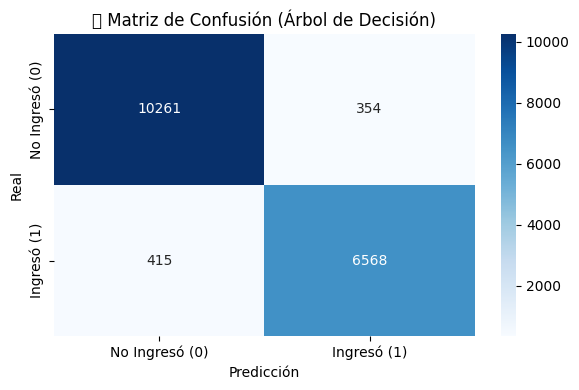

C:\Users\Kenin Ojeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


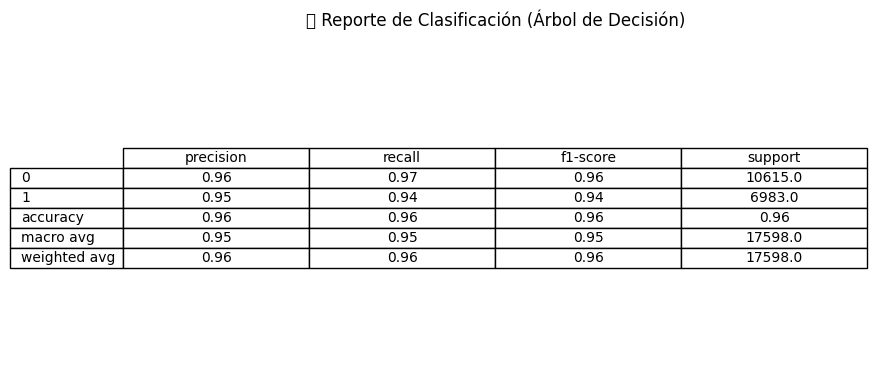

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Entrenar el modelo óptimo
best_arbol = DecisionTreeClassifier(**grid_search_arbol.best_params_, random_state=42)
best_arbol.fit(X_train, y_train)
y_pred = best_arbol.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
labels = ['No Ingresó (0)', 'Ingresó (1)']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('📊 Matriz de Confusión (Árbol de Decisión)')
plt.tight_layout()
plt.show()

# Reporte de clasificación como tabla visual
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(cellText=report_df.round(2).values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("📋 Reporte de Clasificación (Árbol de Decisión)", pad=20)
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Agregar al diccionario
resultados['Decision Tree'].update({
    'F1 Test': round(f1_score(y_test, y_pred), 4),
    'AUC Test': round(roc_auc_score(y_test, y_pred), 4),
    'Accuracy': round(accuracy_score(y_test, y_pred), 4),
    'Precision': round(precision_score(y_test, y_pred), 4),
    'Recall': round(recall_score(y_test, y_pred), 4)
})

# **Ramdom Forest**

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Definir grilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Modelo base
rf = RandomForestClassifier(random_state=42)

# GridSearch con validación cruzada y F1 como métrica
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Ejecutar la búsqueda
grid_search_rf.fit(X_train, y_train)

# Resultados
print("✅ Mejores parámetros:", grid_search_rf.best_params_)
print("🎯 Mejor F1-score promedio (CV):", round(grid_search_rf.best_score_, 4))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
✅ Mejores parámetros: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}
🎯 Mejor F1-score promedio (CV): 0.9301


In [42]:
# Guardar resultados del Random Forest en el diccionario
resultados['Random Forest'] = {
    'F1 CV': round(grid_search_rf.best_score_, 4),
    'Mejores Params': grid_search_rf.best_params_
}

C:\Users\Kenin Ojeda\AppData\Local\Temp\ipykernel_2940\2994532482.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kenin Ojeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


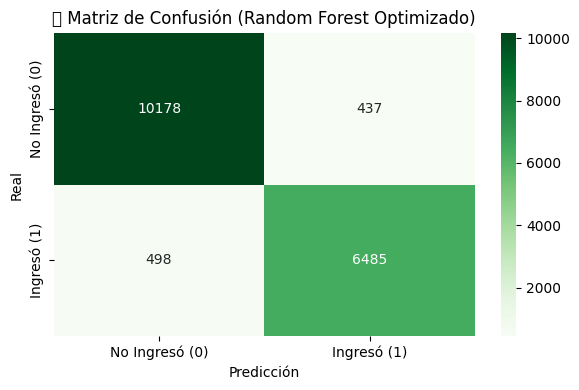

C:\Users\Kenin Ojeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


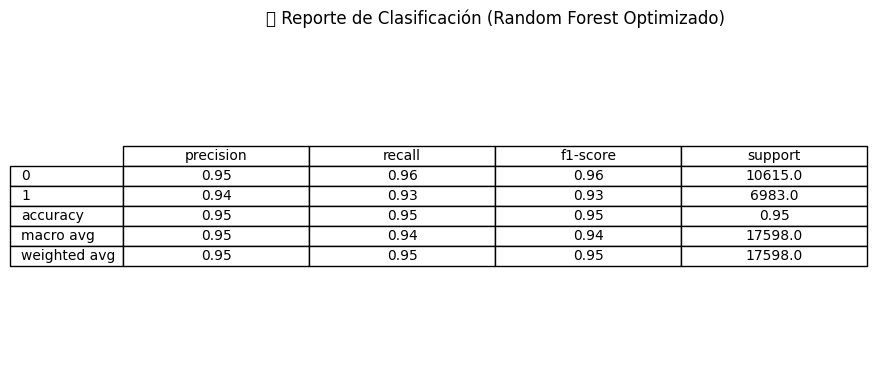

In [43]:
# Entrenar modelo final con mejores parámetros
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

# Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cm = confusion_matrix(y_test, y_pred_rf)
labels = ['No Ingresó (0)', 'Ingresó (1)']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('📊 Matriz de Confusión (Random Forest Optimizado)')
plt.tight_layout()
plt.show()

# Reporte de clasificación como tabla
report_df = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).transpose()

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(cellText=report_df.round(2).values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("📋 Reporte de Clasificación (Random Forest Optimizado)", pad=20)
plt.show()

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

# Calcular métricas
f1_test_rf = round(f1_score(y_test, y_pred_rf), 4)
auc_test_rf = round(roc_auc_score(y_test, y_pred_rf), 4)
acc_rf = round(accuracy_score(y_test, y_pred_rf), 4)
prec_rf = round(precision_score(y_test, y_pred_rf), 4)
rec_rf = round(recall_score(y_test, y_pred_rf), 4)

# Guardar en el diccionario
resultados['Random Forest'].update({
    'F1 Test': f1_test_rf,
    'AUC Test': auc_test_rf,
    'Accuracy': acc_rf,
    'Precision': prec_rf,
    'Recall': rec_rf
})


# **XGBOOST**

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Grilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Modelo base
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# GridSearchCV con validación cruzada (cv=5)
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Ejecutar búsqueda
grid_search_xgb.fit(X_train, y_train)

# Mostrar mejores resultados
print("✅ Mejores hiperparámetros:", grid_search_xgb.best_params_)
print("🎯 Mejor F1-score promedio (CV):", round(grid_search_xgb.best_score_, 4))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Kenin Ojeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:44:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Mejores hiperparámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}
🎯 Mejor F1-score promedio (CV): 0.943


In [45]:
# Guardar resultados del XGBoost en el diccionario
resultados['XGBoost'] = {
    'F1 CV': round(grid_search_xgb.best_score_, 4),
    'Mejores Params': grid_search_xgb.best_params_
}

C:\Users\Kenin Ojeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:46:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Kenin Ojeda\AppData\Local\Temp\ipykernel_2940\2177508484.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kenin Ojeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


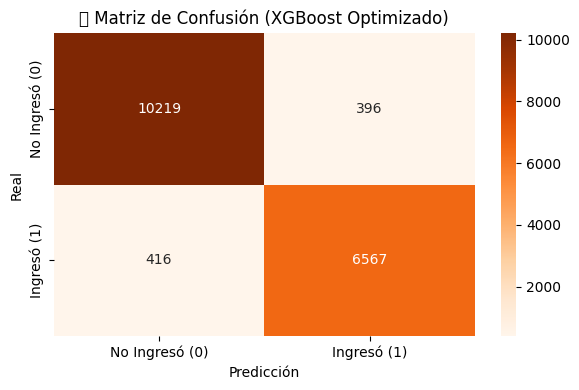

C:\Users\Kenin Ojeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


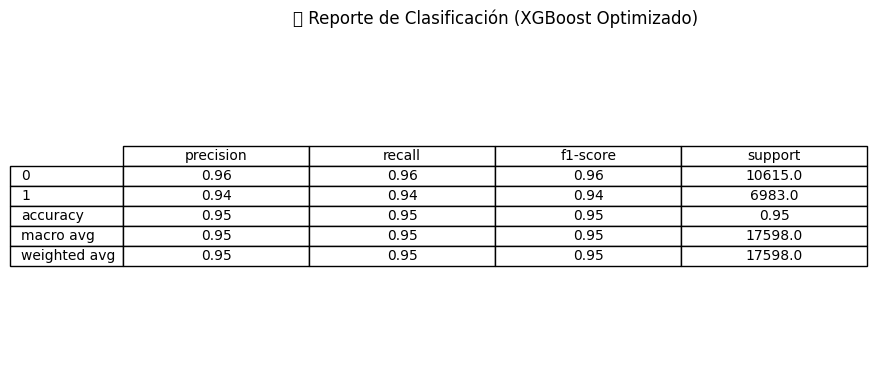

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Entrenar XGBoost optimizado
xgb_best = XGBClassifier(**grid_search_xgb.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_best.fit(X_train, y_train)
y_pred_xgb = xgb_best.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_xgb)
labels = ['No Ingresó (0)', 'Ingresó (1)']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('📊 Matriz de Confusión (XGBoost Optimizado)')
plt.tight_layout()
plt.show()

# Reporte de clasificación
report_df = pd.DataFrame(classification_report(y_test, y_pred_xgb, output_dict=True)).transpose()

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(cellText=report_df.round(2).values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("📋 Reporte de Clasificación (XGBoost Optimizado)", pad=20)
plt.show()

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

# Métricas de test
f1_test_xgb = round(f1_score(y_test, y_pred_xgb), 4)
auc_test_xgb = round(roc_auc_score(y_test, y_pred_xgb), 4)
acc_xgb = round(accuracy_score(y_test, y_pred_xgb), 4)
prec_xgb = round(precision_score(y_test, y_pred_xgb), 4)
rec_xgb = round(recall_score(y_test, y_pred_xgb), 4)

# Guardar en el diccionario
resultados['XGBoost'].update({
    'F1 Test': f1_test_xgb,
    'AUC Test': auc_test_xgb,
    'Accuracy': acc_xgb,
    'Precision': prec_xgb,
    'Recall': rec_xgb
})


# **REDES NEURONALES**

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Definir grilla de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (64, 32, 16)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Modelo base
mlp = MLPClassifier(max_iter=500, random_state=42)

# GridSearch con validación cruzada
grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Ejecutar búsqueda
grid_search_mlp.fit(X_train_scaled, y_train)

# Resultados
print("✅ Mejores hiperparámetros:", grid_search_mlp.best_params_)
print("🎯 Mejor F1-score promedio (CV):", round(grid_search_mlp.best_score_, 4))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Mejores hiperparámetros: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant', 'solver': 'adam'}
🎯 Mejor F1-score promedio (CV): 0.931


In [49]:
# Guardar resultados en el diccionario resultados para MLP
resultados['MLP'] = {
    'F1 CV': round(grid_search_mlp.best_score_, 4),
    'Mejores Params': grid_search_mlp.best_params_
}

C:\Users\Kenin Ojeda\AppData\Local\Temp\ipykernel_2940\3370596997.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kenin Ojeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


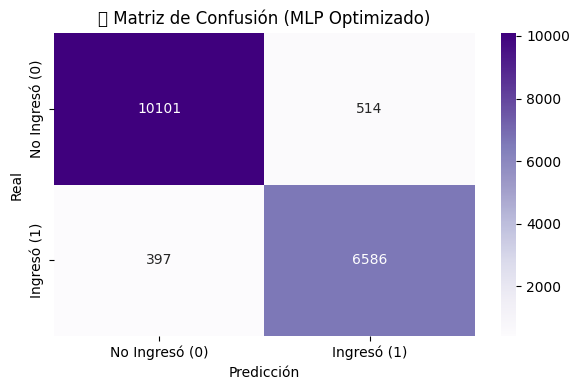

C:\Users\Kenin Ojeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


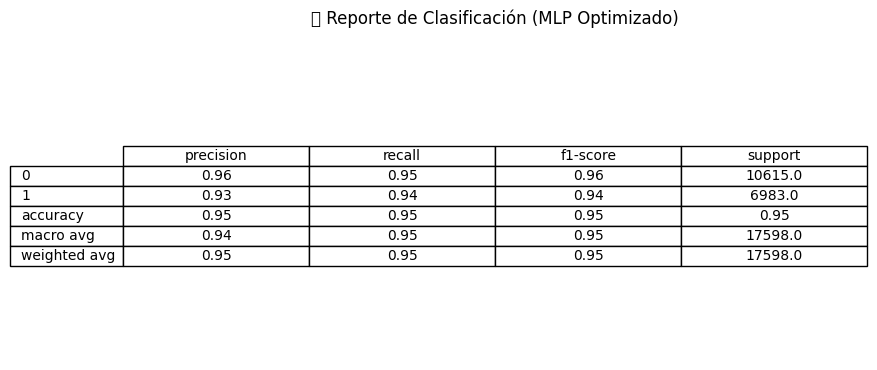

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Escalar conjunto de prueba también
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo final con los mejores parámetros
mlp_best = MLPClassifier(**grid_search_mlp.best_params_, max_iter=500, random_state=42)
mlp_best.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_best.predict(X_test_scaled)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_mlp)
labels = ['No Ingresó (0)', 'Ingresó (1)']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('📊 Matriz de Confusión (MLP Optimizado)')
plt.tight_layout()
plt.show()

# Reporte de clasificación como tabla
report_df = pd.DataFrame(classification_report(y_test, y_pred_mlp, output_dict=True)).transpose()

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(cellText=report_df.round(2).values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("📋 Reporte de Clasificación (MLP Optimizado)", pad=20)
plt.show()

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

# Guardar métricas de test
resultados['MLP'].update({
    'F1 Test': round(f1_score(y_test, y_pred_mlp), 4),
    'AUC Test': round(roc_auc_score(y_test, y_pred_mlp), 4),
    'Accuracy': round(accuracy_score(y_test, y_pred_mlp), 4),
    'Precision': round(precision_score(y_test, y_pred_mlp), 4),
    'Recall': round(recall_score(y_test, y_pred_mlp), 4)
})

# **EVALUACION DE MODELOS**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate  # pip install tabulate

def evaluar_modelos(resultados):
    df = pd.DataFrame(resultados).T

    # Calcular estabilidad F1
    df['F1 Estabilidad'] = (df['F1 Test'] - df['F1 CV']).abs().round(4)

    # Redondear todo a 4 decimales
    df = df.round(4)

    # Ordenar por F1 Test
    df_ordenado = df.sort_values(by='F1 Test', ascending=False)

    # Mostrar tabla en formato bonito con tabulate
    print("📋 Comparación de Modelos Ordenada por F1 Test:")
    print(tabulate(df_ordenado, headers='keys', tablefmt='fancy_grid'))

    # Mostrar mejor modelo
    mejor = df_ordenado.index[0]
    print(f"\n✅ Mejor modelo global: {mejor}")
    print(f"   F1 Test = {df_ordenado.loc[mejor, 'F1 Test']}")
    print(f"   AUC = {df_ordenado.loc[mejor, 'AUC Test']}")
    print(f"   F1 CV = {df_ordenado.loc[mejor, 'F1 CV']}")
    print(f"   Estabilidad = {df_ordenado.loc[mejor, 'F1 Estabilidad']}")

    # Gráfico de barras con anotaciones
    ax = df_ordenado[['F1 Test', 'AUC Test', 'Accuracy']].plot(
        kind='bar', figsize=(10, 6), colormap='Dark2', edgecolor='black'
    )
    plt.title("📊 Comparación de Métricas por Modelo", fontsize=14)
    plt.ylabel("Valor")
    plt.xticks(rotation=0)

    for c in ax.containers:
        ax.bar_label(c, fmt='%.3f', label_type='edge', fontsize=9)

    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    return df_ordenado



📋 Comparación de Modelos Ordenada por F1 Test:
╒═══════════════╤═════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════╤════════════╤════════════╤═════════════╤══════════╤══════════════════╕
│               │   F1 CV │ Mejores Params                                                                                                        │   F1 Test │   AUC Test │   Accuracy │   Precision │   Recall │   F1 Estabilidad │
╞═══════════════╪═════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════╪════════════╪════════════╪═════════════╪══════════╪══════════════════╡
│ Decision Tree │  0.9419 │ {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}                                                   │    0.9447 │     0.9536 │     0.9563 │      0.9489 │   0.9406 │           0.0028 │
├───────────────┼─────────┼──────

C:\Users\Kenin Ojeda\AppData\Local\Temp\ipykernel_2940\1011549219.py:41: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kenin Ojeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


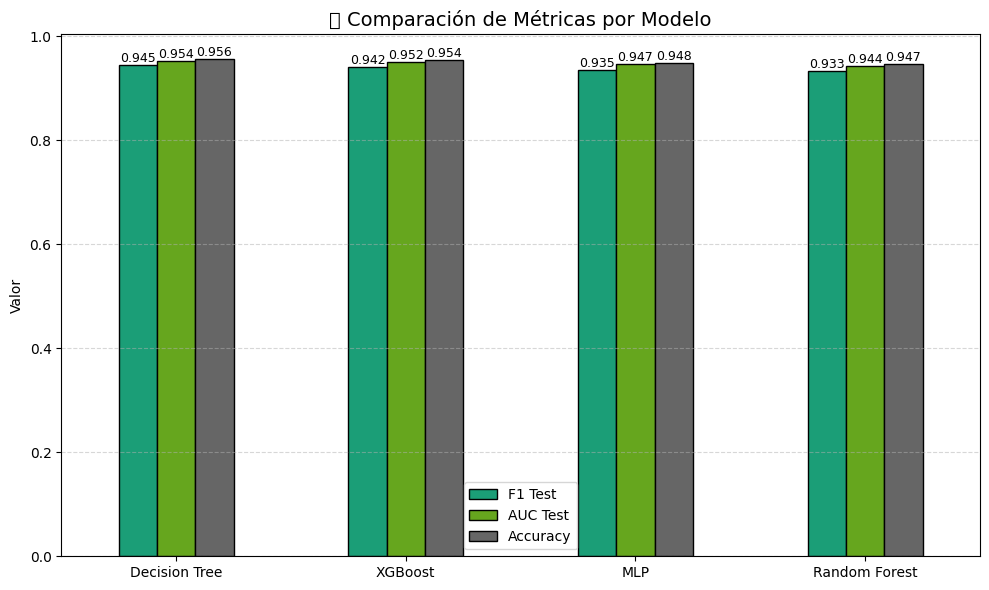

In [52]:
df_comparacion = evaluar_modelos(resultados)

El Árbol de Decisión, pese a ser un modelo "simple", pudo superar a modelos más complejos como XGBoost o MLP debido a las siguiente razones

✅ 1. Depende de la calidad y naturaleza de los datos
Si tus datos ya están bien limpios, balanceados, y con patrones claros, un modelo simple como el árbol puede capturar la estructura sin necesidad de complejidad adicional.

Los modelos complejos como XGBoost o MLP brillan cuando los datos son más caóticos, ruidosos o no lineales, lo cual puede no ser tu caso.

✅ 2. Generaliza mejor con poco riesgo de sobreajuste
Árboles de decisión bien ajustados (como el tuyo, con max_depth=None y min_samples_split=5) pueden lograr un buen balance entre sesgo y varianza.

XGBoost y MLP tienden a sobreajustarse si no se calibran cuidadosamente, y eso puede hacer que rindan peor en test aunque tengan buen CV.

✅ 3. El árbol te dio las mejores métricas
No es una suposición, es una observación empírica basada en:

F1 Test más alto

Accuracy más alto

Buena estabilidad (F1 Test vs CV)

Precision y Recall equilibrados

Incluso si fuera “menos poderoso”, los datos mandan, y el árbol se adaptó mejor.

✅ 4. Interpretabilidad
En entornos productivos (como admisión a la UNI), un modelo explicable genera más confianza que uno caja negra. Puedes ver reglas claras del árbol, lo que es útil para auditar o justificar decisiones.